In [1]:
path = 'C:\\Users\\moon\\Documents\\stats\\'

In [54]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

from statsmodels.stats.proportion import proportions_ztest

In [4]:
# 정규분포 - 누적확률 값 계산

mu = 115
sigma = 20
x = 135
prob = stats.norm.cdf(x, mu, sigma)
print('{0}분 이상 걸리는 A/S 작업 비율:{1:.1f}%'.format(x,(1-prob)*100))

135분 이상 걸리는 A/S 작업 비율:15.9%


In [9]:
# 정규분포 - 누적확률 값 계산2

mu = 12
sigma= 3
x1 = 15
prob1 = stats.norm.cdf(x1,mu,sigma)
print('{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}%에 해당함'.format(mu, x1, (prob1-0.5)))

12km 이상 15km 이하를 달릴 확률은 0.341%에 해당함


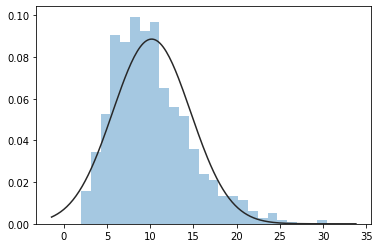

In [16]:
# X^2 분포 그리기

np.random.seed(seed=1234)
# 자유도 10, 데이터 1000개의 x2분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df=10, size=1000)

sns.distplot(chisq_df10, fit=stats.norm, kde=False)

In [18]:
# X2 값이 10일 때, P(X<x2)을 계산(df=30)

chisq = 10
df = 30

prob=stats.chi2.cdf(chisq, df)
print('P(X<={0}):{1:.4f}'.format(chisq, prob))

P(X<=10):0.0002


In [20]:
# F분포 - F는 각각 자유도가 15, 15인 F.
# F값 = 2.0일때, P(X<=F)을 계산하시오.

f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f, dfn=dfnum, dfd= dfden)
print('P(X<=F):{:.3f}'.format(prob))

P(X<=F):0.904


In [21]:
# 이항분포
# 불량확률 0.4
# 3대 차량 선택시 불량대수가 각각 0, 1, 2, 3이 나올 확률

n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print('P(X={0})={1:.3f}'.format(i, prob))

P(X=0)=0.216
P(X=1)=0.432
P(X=2)=0.288
P(X=3)=0.064


In [25]:
# 포아송 분포
# 전화 교환대 1분 평균 2대 걸려옴 - 포아송 분포 따른다 가정
# 1분당 3번의 전화가 걸려올 확률?
# 1분당 최대 2회 이하의 전화가 걸려올 확률?

mu = 2
# 1분당 3번의 전화
prob = stats.poisson.pmf(3, mu)
# 1분당 최대 2회 이하 전화
cdf_prob = stats.poisson.cdf(2,mu)
print('1분당 {0}번의 전화가 걸려올 확률:{1:.3f}'.format(3, prob))
print('1분당 최대{0}회 이하의 전화가 걸려올 확률:{1:.3f}'.format(3, cdf_prob))

1분당 3번의 전화가 걸려올 확률:0.180
1분당 최대3회 이하의 전화가 걸려올 확률:0.677


In [35]:
# 정규성 검정(샤피로)

ds_camshaft = pd.read_csv(path+'camshaft.csv')

statistic, p = stats.shapiro(ds_camshaft.Supp1)
print('statistic={0}, p-value={1}'.format(statistic,p))
# 정규성 검정이므로 p값이 0.05클 때, 정규성있는 것으로 판단.

statistic=0.9788156747817993, p-value=0.10744144767522812


In [ ]:
# 모평균 구간추정(모평균 아는경우)
# 새로운 품종 배추 40통을 랜덤추출하여 무게 측정.
# 모표준편차 0.397. 95%신뢰구간은?

df = pd.DataFrame({'sample':[3.6,2.9 ...]})
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))

print('신뢰구간: ({0},{1})'.format(lower.round(2), upper.round(2)))

In [ ]:
# 모평균 구간추정(모평균 모르는 경우)
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = scipy.stats.sem(df)) # sem은 표준오차. s/sqrt(n)

In [ ]:
# 모비율 신뢰구간

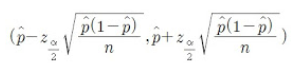

In [42]:
# 평균검정 t-test (모집단 표준편차 모르는 경우)
# 고객만족도 평균 76.7 -> 개선활동 후 만족도 변화 있는가?
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82,76.3,75.7,80.2,72.6,77.9,82.8]})

t_result = stats.ttest_1samp(df, 76.7)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('t통계량:{}'.format(t))
print('p-value:{}'.format(p))

# 만족도 변화시켰다고 할 수 없다.

t통계량:[0.864]
p-value:[0.41]


In [50]:
# 2sample t-test
# 두 고객 모평균 차이 있는가?

df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

print('등분산성 검정:', stats.levene(df1['sample'], df2['sample']))

t_result = stats.ttest_ind(df1, df2, equal_var = False)

t, p = t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('t: {}'.format(t))
print('p: {}'.format(p))

# 귀무가설 기각, 고객간에 만족도 차이 있다.

등분산성 검정: LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)
t: [-3.122]
p: [0.003]


In [ ]:
# paired T-test

t_result = stats.ttest_rel(df1, df2) # 위와 같은 방식

In [56]:
# 1 proportion test
# 고급강 A제품을 가공하는 국내 고객사는 전체 중에 10%정도가 된다. 한 해 동안 A제품의 품질에 대해 노력을 하여 전체 고객중 100여개 업체를 표본으로 하여 가공품질을 확인한 후 15개의 업체가 만족을 표현했다.
# 과연 품질개선을 한 결과로 기존보다 전체 고객 중 사용비율의 차이가 있는 것인가?

count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

print('1 proportion test')
print('z: {}'.format(stat))
print('p: {}'.format(pval))
# 차이 있다고 할 수 없다.

1 proportion test
z: 1.4002800840280094
p: 0.16142946236708322


In [58]:
# 동일 제품 생산 두 공장 불량률 측정, 두 공정 불량률 같다고 할 수 있는가?
# 공장1: N1=1000, x1=4/ N2=1200, x2=1
#p1 = x1/n1
#p2 = x2/n2

count = np.array([4,1])
nobs = np.array([1000,1200])

stat, pval = proportions_ztest(count, nobs)
print(stat, pval) # 차이 있다고 할 수 없다.

1.553109404737079 0.12039699966295712


In [60]:
# ## 문제3 - p159 카이제곱 검정
#### 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 323명의 소비자를 대상으로 설문조사한 테이블이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가? (유의수준 = 0.05)

In [62]:
data = pd.DataFrame({'A':[18,1,8,7,10,9,10],'B':[8,2,14,5,5,9,4],'C':[4,1,3,4,9,5,4],'D':[4,1,2,3,2,7,3],'E':[3,1,3,1,1,1,1],'F':[3,25,8,10,2,1,7]})

# 가설 검정의 수행
chi, pval, dof, expected = stats.chi2_contingency(data.T)

print('chi-square test')
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))
# 이미지 차이 있다고 할 수 있다.

chi-square test
chisq:98.274
p:0.000
degree pf freedom:30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


In [ ]:
# 1way anova
f_result = stats.f_oneway(df['a'],df['b'],df['c'])

f, p = f_result.statstic.round(3), f_result.pvalue.round(3)

In [ ]:
# 상관분석
corr, pval = stats.pearsonr(df1,df2)

print(corr, pval)

In [ ]:
# 회귀분석
time = sm.add_constant(time) # time은 x변수
model = sm.OLS(strength, time)
result = model.fit()

print(result.summary())